In [1]:
%matplotlib inline

import pickle, os, glob
from EEG.info import info_exp
from EEG.converter import converter_mne
import mne
import numpy as np

In [3]:
root = "C:\\eeg\\01exp\\"
name = "20161129_DBS_001"

def load(path,name):
    with open(path + '/' + name, 'rb') as input:
        data = pickle.load(input)
        return data

In [5]:
test = load(root + name,'exp_data_aligned.cls')

In [6]:
test.getinfo()

Experiment status:  True ; Num tests:  12
Align status:  True
Respondent name:  Ольга Ветрова
Description: Эксперимент с обратной связью
Labels_names: [ удалено, отдых, левая, правая ]
Frequency: 1000
Count train activities:  45
Count tests activities: [ 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30 ]
Time of activity: 4500
Type_chanels: eeg  Montage: standard_1005
------------------------------------------------------------------
Chanels_names:
------------------------------------------------------------------
FC5        FT7        FC3        FCz        FC4        FT8       
T3         C3         Cz         T4         C4        
TP7        CP3        CPz        CP4        TP8       
FC1        FC2        FC6        P4         C5        
C1         C2         C6         P3         CP5       
CP1        CP2        CP6        POz       
------------------------------------------------------------------
List tests
------------------------------------------------------------------
2016112

In [8]:
test2  = converter_mne(test)
epochs = test2.get_epochs()
picks = mne.pick_types(info=test2.get_mne_info(), meg=False, eeg=True, misc=False)

45 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


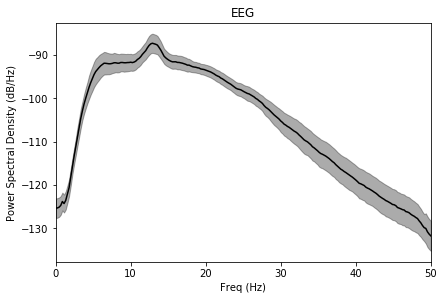

Figure(432x288)


In [16]:
print epochs.plot_psd(tmax=np.inf,fmax=50)

In [11]:
epochs[u'правая']

<EpochsArray  |  n_events : 15 (all good), tmin : 0.0 (s), tmax : 4.499 (s), baseline : None, ~15.5 MB, data loaded>

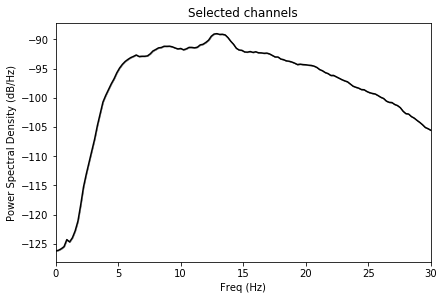

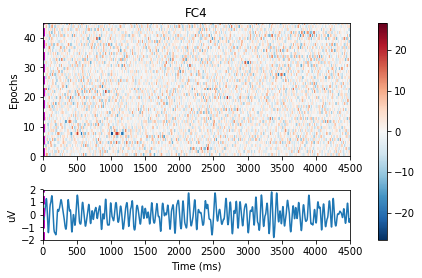

In [14]:
epochs.plot_psd(tmax=np.inf,picks=[0],fmax=30)
epochs.plot_image(4, cmap='interactive')

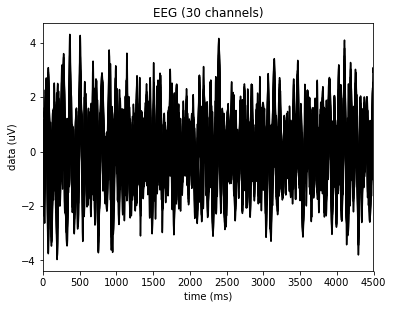

Figure(432x288)


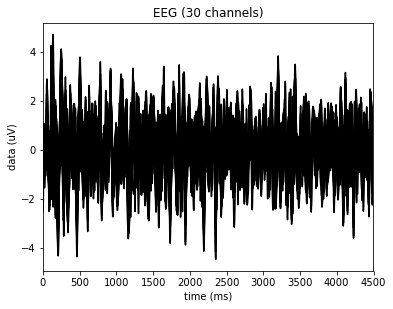

Figure(432x288)


In [13]:
evoked_left = epochs[u'левая'].average(picks=picks)
evoked_right = epochs[u'правая'].average(picks=picks)
print evoked_left.plot()
print evoked_right.plot()